In [1]:
# import modules
import os, sys
import numpy as np
import math


In [2]:
# define problem parameters
Length = 1
Time = 20
Qo=10000
conductivity = 10
alpha = 0.05
T_initial = 0
T_left = 100
TimeConst=20


In [3]:
# define numerialc parameters
num_x = 31
num_t = 10001

In [4]:
# get delta-time and delta-x
dt = Time / (num_t-1)
dx = Length / (num_x - 1)

# initialize memory to store T profile for each (x,t) and intialize to intial condition
T = T_initial * np.ones([num_x, num_t])



In [5]:
# solve the eqn for each time-step now
for t in range(1,num_t):
    for i in range(1,num_x-1):
        T[i,t] = T[i,t-1] + (alpha*dt/(dx*dx)) * (T[i-1,t-1] + T[i+1,t-1] - 2*T[i,t-1]) -alpha*dt*(Qo*math.sin(3.14*i*dx/Length)*math.exp(-t*dt/TimeConst))/conductivity
    
    # bdry conditions
    T[0,t] = T_left
    T[num_x-1,t] =  Qo*math.sin(3.14*dx/Length)*math.exp(-num_t/TimeConst) + T[num_x-2,t] 

Text(0, 0.5, 'x')

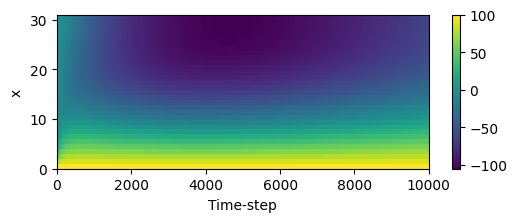

In [6]:
# plot the results now
from matplotlib import pyplot as plt
from matplotlib.pyplot import pcolor
fig, axs = plt.subplots(1, 1, figsize=(6,2))
c = axs.pcolor(T[:,:])
fig.colorbar(c, ax=axs)

plt.xlabel('Time-step')
plt.ylabel('x')

#Plot for Qo = 1 , num_x =11 , num_t= 101